## EXAMEN FINAL
### SOFIA DAGER
### 20201095

In [8]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns


### PARTE 1: TEORÍA

### 1. (3 puntos) Instrumental Variables (IV)

Suponga que estamos interesados en estudiar la relación entre educación (X) y el nivel de ingresos (Y).
Un investigador propone utilizar como variable instrumental (Z) el numero de horas que una persona utilizó para ver televisión cuando era niño.

**a) Indetifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.**

* Para poder implementar un enfoque IV en este ejemplo se necesitan los siguientes elementos:
  - Z no está correlacionada con el error del modelo: C(Z,e) = 0
  - Z está correlacionada con la variable endógena C(Z; X) ≠ 0
  - se debe satisfacer la relevancia y la exclusión. 
* Necesitamos tener las variables X, Y y Z que ya nos han sido entregadas y verificar con la ayuda de lo expuesto anteriomente, si es que la variable Z será válida y puede usarse. 

**b) Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones**

* Recordemos el backdoor pathway. Hay un pathway de $Z$ a $Y$ a través de $X$. Si $Z$ varía entonces vemos que $Y$ varía pero solo porque $X$ varió. Debido al efecto de causalidad $Y$ va a cambiar y en ese momento, la correlación se convierte en causalidad. Por lo tanto, con las variables que tenemos, vemos que $Z$ que es el número de horas que utilizó para ver televisión una persona cuando era niño y $X$ que es la educación tienen una relación y también causalidad.
* A través de la intuición podemos decir que a más horas que un niño ve televisión, menos horas estará estudiando. Y al estudiar menos, puede haber una correlación con el nivel de ingresos. Esto que hemos visto con la intuición, se demuestra con lo mencionado anteriormente y con esta ecuación: $X$ and $Y$: $X \leftarrow U \rightarrow Y$.
* $Z$ está correlacionada con $X$ y por su correlación con esta también se ve correlacionada con $Y$. 

**c) ¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación**
* El efecto de la educación sobre el nivel de ingresos es positivo. Vemos que a más estudio habrá más ingresos y también podemos decir que la relación del numero de horas que vio televisión y los ingresos tienen un efecto negativo e inverso. A más horas de televisión, menos ingresos. Esto de menos ingresos lo sabemos debido a que sabemos que $Z$ e $Y$ están correlacionadas por el backdoor path de $X$ 






### 2. (3 puntos) Regression Discontinuity Design (RDD)

Supongamos que estamos estudiando la eficacia de un programa de becas creado por el gobierno Peruano sobre las notas de los alumnos al final del primer semestre en la universidad. PRONABEC ha decidido que entregará becas a aquellos postulantes que tengan un promedio superior durante la secundaria igual a 16 .

**a) Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo.**

* Necesitamos los siguientes elementos 
    - Execution variable ($X$): variable que determina si recibe o no el tratamiento 
    - Corte ($c_0$): Es el límite de la variable donde se determina si recibe el tratamiento o no. Los que están detrás del corte son los que no recibieron y los que estan a su derecha son los que si recibieron el tratamiento. 
    - Treatment ($D$): Representa si recibió el tratamiento (1) or no (0)


**b) Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.**

* Primero deben filtrarse las notas de todos los alumnos y establecer el límite que en este caso es 16 de promedio de nota de secuendaria. En este caso usamos en Sharp design porque tenemos un limite establecido. Una vez que se implementa el modelo podemos hacer el estimado. 

*ECUACIÓN SHARP DESIGN*
$$
D_i =
   \begin{cases} 1
       \text{si} & X_i\geq{c_0}
       \\ 0
       \text{ if } & X_i < c_0
   \end{cases}
$$


**c) ¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .**

* El efecto de la política sobre el rendimiento de los estudiantes es positivo. Pues vemos que estudiantes de bajos recursos tendrán la oportunidad de acceder a una beca si es que el promedio de su escolaridad en secundaria es de 16 o más. Esto motiva a los estudiantes que no tienen los recursos para ir a la universidad. Puede haber una correlación, pero vemos claramente causalidad. Un alumno que tiene interés de ir a la universidad y que sabe que obtendrá una beca por tener una nota en específico, se esforzará más por obtener tener notas y así poder conseguirla. 


### 3. (3 puntos) Difference in Difference (DiD)

Supongamos que estamos interesados en estudiar el impacto de la migración en la tasa de empleo en dos regiones del Perú en 2017-2018. Tenemos datos anuales sobre la tasa de empleo en Lima, que experimentó una afluencia significativa de inmigrantes en 2018, y Puno que no experimentó el ingreso de migrantes (2017 ninguna de las regiones experimentó afluencia de migrantes). Podemos usar un análisis DID para comparar el cambio en las tasas de empleo entre las dos regiones a lo largo del tiempo para ver si la migración tuvo algún efecto.

**a) Indetifique todos los elementos necesarios para implementar un DiD en este ejemplo.**

* El DID nos ayuda a estimar el efecto del tratamiento comparando las situaciones pre tratamiento y post tratamiento en los resultados del grupo de tratamiento y el grupo de control. 
* El supuesto más importante es "el Parallel Trend Assumption" el cual se basa en que nada cambia en el mismo momento. O sea, si el tratamiento no hubiese sucedido, la brecha entre ambas variables seguiría igual. 
* Necesitamos al pre grupo de control y al pre grupo de tratamiento; y al post  grupo de control y al post grupo de tratamiento. 

**b) Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.**

* Tenemos la siguiente ecuación:

$$
\widehat{\delta}^{2\times 2}_{kU} = \bigg ( \overline{y}_k^{-post(k)} - \overline{y}_k^{-pre(k)} \bigg ) - \bigg ( \overline{y}_U^{-post(k)} - \overline{y}_U^{-pre(k)} \bigg )
$$

* Con esa ecuación tenemos la comparación de cómo se ha dado el tratamiento en ambos grupos y podemos ver las diferencias del mismo. 

**c) ¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .**

* El efecto de migración sobre la tasa de empleo es positivo pues a más migración habrá más empleos. Esto se debe ver de la siguiente manera: la mayoría de los migrantes están buscando una mejor vida y mejores oportunidades y muchas veces llegan a un nuevo lugar sin nada. Es por eso que muchas veces toman empleos que las personas que residen y tienen una vida en el lugar no toman y la tasa de empleo sube. Por ejemplo, muchos migrantes latinos en norteamérica son los que toman trabajos de limpieza porque no mucha de la población norteamericana los desea tomar, eso no significa que "quiten trabajo"

### 4. (3 puntos) Lecturas

Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713., **¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?**

* Las principales debilidades del paper al igual que muchos vistos en el ciclo es que se muestra el experimento y se muestran los datos, pero esto no se hace a manera de testimonio o de caso. Es decir, si en el paper los autores incluyeran testimonios de inventores en los que estos comenten por ejemplo que el ambiente en el que crecieron los ayudó, que sus modelos (padres, compañeros de trabajo, vecinos) fueron inventores y que eso ayudó o los interesó a introducirse a ese campo, ayudaría a darle mpas legitimidad al artículo de parte de los lectores. Por otro lado, sería interesante implementar los resultados en gráficos comparativos. Es decir, mostrar la variable y luego mostrar un gráfico que demuestre que esta efectivamente influyó en que un niño más tarde se convierta en un inventor. 

Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903, **¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación?** 

* Los siguientes pasos para avanzar en la pregunta de investigación podrían ser seguir investigando las variables presentadas y así poder mostrar las consecuencias de la mita, tal vez hasta hoy en día. Por otro lado, para verlo desde una perspectiva más económica, el Estado podría encargarse de llevar a cabo una investigación para darse cuenta si por ejemplo, los ancentros de las personas que viven en extrema pobreza hoy en día fueron víctimas de la mita y así encontrar una razón para esa pobreza y poder implementar medidas que sean de desarrollo y progreso para el país. 




### PARTE 2: CÓDIGO

### 5. (4 puntos) Código

#### Ploteo de Histogramas




In [6]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


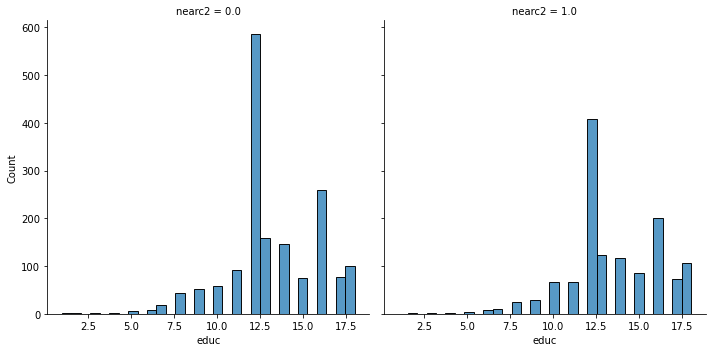

In [10]:
sns.displot(card, x = "educ", col = "nearc2")

A través de estos gráficos podemos observar que el hecho de vivir cerca de una universidad de 2 años sí tiene efecto en la educación. Pues vemos que mientras más personas vivan cerca de un college de 2 años, más años estarán estudiando. 

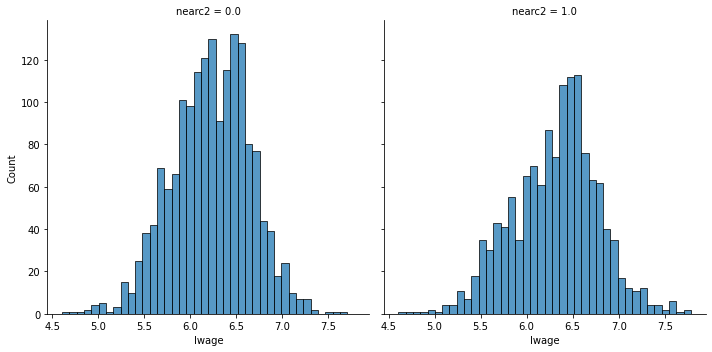

In [12]:
sns.displot(card, x = "lwage", col = "nearc2")

Se ve una distribución de datos normal. Vemos que la mayoría de datos se ven concentrado en el centro del gráfico. Por lo tanto, no podemos inferir que por vivir cerca de un college de 2 años se vaya a tener más ingresos económicos. Algo más que se puede observar es que tenemos datos muy altos y datos muy bajos. En cada gráfico se ve que hay una gran diferencia en ingresos económicos, gente con muchos ingresos y gente con pocos ingresos

### Regresiones
#### REGRESIÓN LINEAL MULTIPLE


In [13]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        16:44:57   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con esta regresión lineal multiple podemos ver que la mayoría de nuestros valores tienen un P-value menor a 0.05 y por lo tanto, podemos afirmar que son significativas para nuestro modelo.

Al ver el R cuadrado ajustado, vemos que el modelo explica a un 30%. Un nivel explicativo mediano. 

La ecuación del modelo sería: 5.0633 + (0.0712 + 0.0342 - 0.1660 - 0.1316 - 0.0359 + 0.1758) * X

#### REGRESIÓN IV 

In [14]:
card['married'] = card['married'].fillna(0) 

iv_reg = IV2SLS.from_formula("lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        16:52:57   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

En este caso vemos al P-value de la mayoría de los valores mayor a 0.05 por lo que no son significativos para el modelo. Además, al ver el R cuadrado ajustado, vemos que es negativo, por lo tanto no tiene nivel explicativo. 


